# ** Google Advanced Data Analytics Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


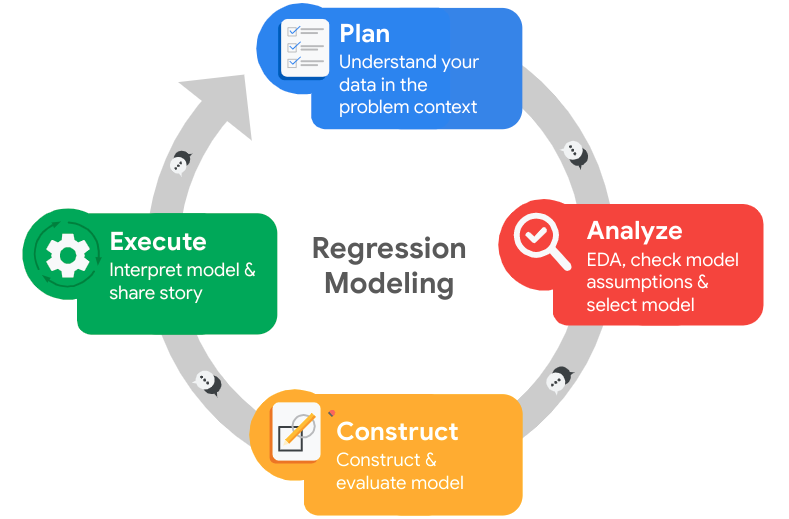

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?


    * Primary Stakeholder: HR Department of Salifort Motors
    * Secondary Stakeholder: Senior Leadership Team, Employees of Salifort Motors
    * Tertiary Stakeholder: The Data Analysis Team working on this project
    

- What are you trying to solve or accomplish?

    * Conduct a comprehensive analysis of the employee dataset to gain insights into factors affecting employee retention.
    * Develop a predictive model to identify employees likely to leave.
    * Provide data-driven recommendations to improve employee satisfaction and retention.
    * Aim to identify the factors affecting employee retention at Salifort Motors and develop a reliable model to predict employee attrition, thereby enabling the company to implement proactive measures to enhance employee satisfaction and reduce turnover.


- What are your initial observations when you explore the data?

    * When exploring the data, special attention will be paid to the distribution of variables, presence of outliers, and missing values.
    * Initial observations will include understanding the correlation between variables and visualizing the data to identify patterns and trends.



- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

    * Dataset Characteristics: 15,000 rows with 10 variables as described in the provided data dictionary.
    * Key Variables: satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary.



- Do you have any ethical considerations in this stage?

    * Data Privacy: Ensure the privacy and confidentiality of employee data by not disclosing any personal information.
    * Bias and Fairness: Address any biases in the data and ensure that the analysis and model do not discriminate against any group or individual.
    * Transparency and Accountability: Clearly document all steps, methodologies, and assumptions made during the analysis and be accountable for the findings and recommendations.




## Step 1: Import Data

### Import packages

In [1]:
# Importing Libraries for Data Operations
import pandas as pd
import numpy as np

# Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Importing Libraries for Model Development and Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

# Ensuring that the plots are displayed in the Jupyter Notebook
%matplotlib inline


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
# Renaming columns for consistency
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'Department': 'department'
}, inplace=True)

# Displaying all column names after the update
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

missing = df0.isna().sum()

missing

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated().sum()

print(f"the number of duplicates is: {duplicates}")

the number of duplicates is: 3008


In [9]:
# Inspect some rows containing duplicates as needed
duplicates_df = df0[df0.duplicated(keep=False)]

duplicates_df.head(25)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df_cleaned.shape


(11991, 10)

### Check outliers

Check for outliers in the data.

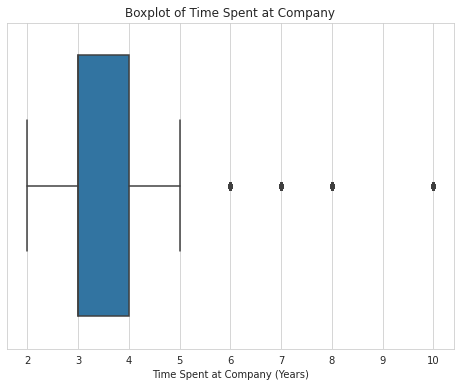

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw a boxplot of time_spend_company
sns.boxplot(x=df_cleaned['time_spend_company'])

# Set plot title and labels
plt.title('Boxplot of Time Spent at Company')
plt.xlabel('Time Spent at Company (Years)')

# Show the plot
plt.show()


In [12]:
# Determine the number of rows containing outliers

import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(df):
    # Get list of numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column_name in numerical_columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        outliers = df[(df[column_name] < lower_limit) | (df[column_name] > upper_limit)]
        
        # Box plot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column_name])
        plt.title(f'Box plot of {column_name}')
        plt.show()
        
        print(f'Number of rows containing outliers in {column_name}: {len(outliers)}')



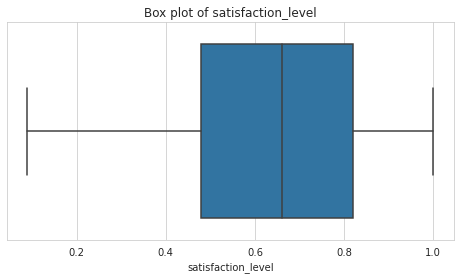

Number of rows containing outliers in satisfaction_level: 0


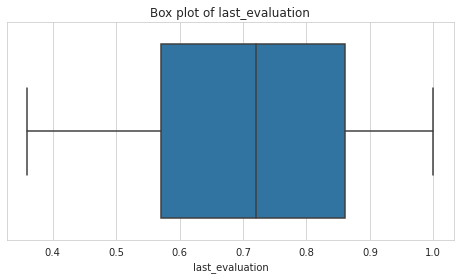

Number of rows containing outliers in last_evaluation: 0


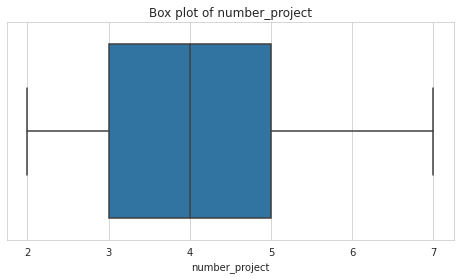

Number of rows containing outliers in number_project: 0


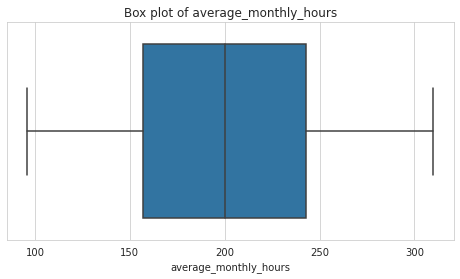

Number of rows containing outliers in average_monthly_hours: 0


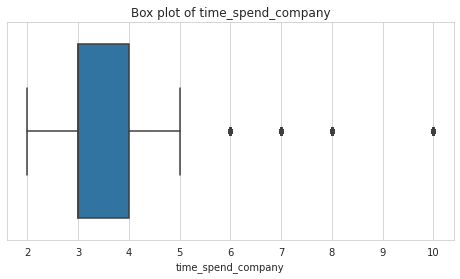

Number of rows containing outliers in time_spend_company: 824


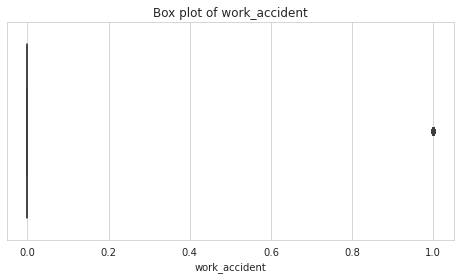

Number of rows containing outliers in work_accident: 1850


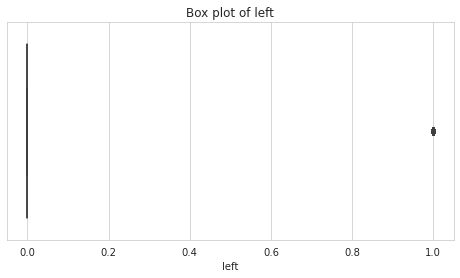

Number of rows containing outliers in left: 1991


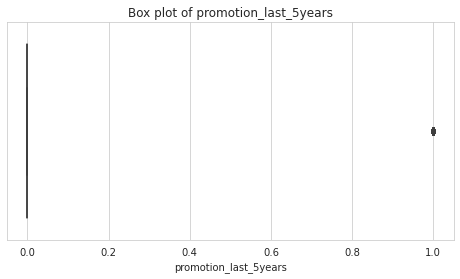

Number of rows containing outliers in promotion_last_5years: 203


In [13]:
# Call this function with the dataframe to visualize all numerical columns:
visualize_outliers(df_cleaned)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

### Binary Outliers? 

The visualization of box plots for binary or categorical variables (like work_accident, left, and promotion_last_5years) or variables with very low variance will not be meaningful and typically would show just a line or dots, as you are observing. This is because these variables are not continuous and don’t have the concept of quartiles, which are the basis for a box plot.

For example, work_accident is likely a binary variable (0 or 1), indicating whether a work accident occurred. In this scenario, a box plot is not useful, and the "outliers" are likely the "1" values, assuming they are less frequent.

Similarly:

    * `left` is probably indicating whether an employee has left (1) or not left (0).
    * `promotion_last_5years` likely indicates whether an employee received a promotion in the last 5 years (1) or not (0).

For these kinds of variables, a different type of plot like a bar plot or count plot would be more appropriate, which shows the count/frequency of each category in these variables.

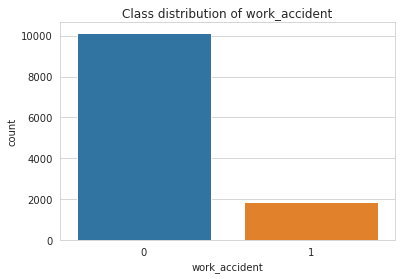

Class count for work_accident:
0    10141
1     1850
Name: work_accident, dtype: int64



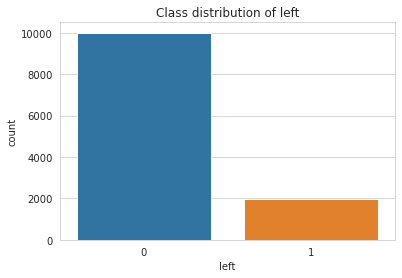

Class count for left:
0    10000
1     1991
Name: left, dtype: int64



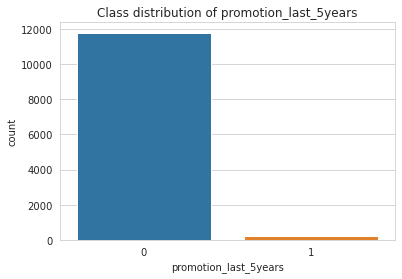

Class count for promotion_last_5years:
0    11788
1      203
Name: promotion_last_5years, dtype: int64



In [14]:
def visualize_class_imbalance(df, column_name):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[column_name])
    plt.title(f'Class distribution of {column_name}')
    plt.show()
    
    # Returning the count of each class
    return df[column_name].value_counts()


# visualize class balance for each categorical variable 
categorical_columns = ['work_accident', 'left', 'promotion_last_5years']

for col in categorical_columns:
    class_count = visualize_class_imbalance(df_cleaned, col)
    print(f'Class count for {col}:\n{class_count}\n')



## Outliers Action List

1. **Variable_Name_1:**
   - **Findings:** [Your findings about the outliers in this variable.]
   - **Decision:** [Keep / Adjust / Remove]
   - **Rationale:** [Your rationale for the decision.]

2. **Variable_Name_2:**
   - **Findings:** [Your findings about the outliers in this variable.]
   - **Decision:** [Keep / Adjust / Remove]
   - **Rationale:** [Your rationale for the decision.]

This should be updated AFTER the Analyze phase,  it is generally a good idea to be cautious when deciding to remove them, as they can contain valuable information and can sometimes be indicative of genuine variations in the data. Moreover, some models are robust to outliers.

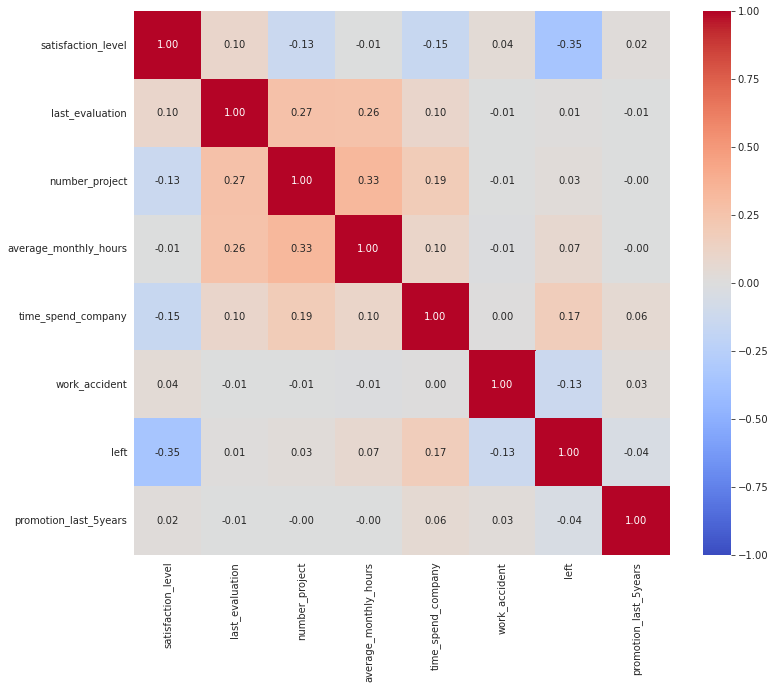

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show plot
plt.show()

1. **Satisfaction Level:**
   - Strong negative correlation with `left` (-0.35): This implies that employees who are less satisfied are more likely to leave the company. It is the most strongly correlated feature with the target variable `left`.
   - Negative correlation with `time_spend_company` (-0.15): This might suggest that the longer an employee stays in the company, the lower the satisfaction level.

2. **Last Evaluation:**
   - Positive correlation with `number_project` (0.27) and `average_monthly_hours` (0.26): This implies that employees who are evaluated higher tend to work on more projects and have higher average monthly hours.

3. **Number of Projects:**
   - Positive correlation with `average_monthly_hours` (0.33): This indicates that as the number of projects increases, the average monthly hours also increase.
   - Positive correlation with `time_spend_company` (0.19): Employees with more projects tend to spend more time in the company.

4. **Average Monthly Hours:**
   - Slight positive correlation with `left` (0.07): This is an indication that employees who work more hours are slightly more likely to leave the company.

5. **Time Spent at Company:**
   - Positive correlation with `left` (0.17): This implies that employees who have spent more time at the company are more likely to leave.
   - Positive correlation with `promotion_last_5years` (0.056): Employees who have spent more time at the company are more likely to have received a promotion in the last 5 years.

6. **Work Accident:**
   - Negative correlation with `left` (-0.125): Employees who have had a work accident are less likely to leave the company.
   - Slight positive correlation with `promotion_last_5years` (0.03): Indicates that employees who have had a work accident have a slightly higher chance to get a promotion.

7. **Promotion Last 5 Years:**
   - Negative correlation with `left` (-0.044): Employees who have received a promotion in the last 5 years are less likely to leave.

### Insights:
- The satisfaction level of employees is the most significant factor influencing the decision to leave the company.
- Employees who have higher last evaluations, work on more projects, and have higher average monthly hours are less satisfied and more likely to leave.
- Factors like work accidents and promotions in the last 5 years have relatively minor but notable impacts on the decision to leave.

### Recommendations:
- Employee satisfaction level needs serious consideration, and measures to improve it can significantly reduce the employee churn rate.
- Maintaining a balance in the number of projects and average monthly hours can contribute to employee satisfaction and retention.
- Recognizing and addressing the aspects influencing the time spent at the company can also play a vital role in employee retention.


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭

## Reflect on these questions as you complete the analyze stage


### What did you observe about the relationships between variables?
- Several categorical variables such as `Department` and `salary` exhibited varying proportions of employees who left, hinting at potential relationships between these variables and the target variable `left`.
- Continuous variables like `satisfaction_level` and `last_evaluation` displayed different distributions amongst employees who left and those who stayed, signaling potential underlying patterns.
- Binary variables like `Work_accident` and `promotion_last_5years` showed imbalances and varied significantly with respect to the target variable `left`.

### What do you observe about the distributions in the data?
- The `satisfaction_level` variable had varied distributions, with notable proportions of employees who left having either very low or high satisfaction levels.
- The `last_evaluation` variable demonstrated a broad spread among employees who left, predominantly among those with higher evaluations.
- There were notable imbalances in the distribution of binary variables, with a majority of instances concentrated in one category.

### What transformations did you make with your data? Why did you chose to make those decisions?
- Basic data cleaning was performed to handle missing or anomalous values and ensure data integrity.
- Specific transformations weren’t extensively applied at this stage, as the primary focus was on understanding the data distributions and relationships.

### What are some purposes of EDA before constructing a predictive model?
- EDA is crucial for uncovering the underlying patterns, relationships, anomalies, or trends in the data.
- It helps in identifying the suitable features for model training and revealing any needed transformations or data processing steps.
- EDA provides insights into data imbalances, which might necessitate resampling techniques, and informs the choice of evaluation metrics for model performance.

### What resources do you find yourself using as you complete this stage?
- [Seaborn Documentation](https://seaborn.pydata.org/) for creating visualizations to understand data distributions and relationships.
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) for data manipulation and analysis.
- Expertise and experience in data analysis and machine learning.

### Do you have any ethical considerations in this stage?
- It is imperative to ensure that the analysis is free from biases and prejudices, especially when analyzing variables like `Department` and `salary`.
- The imbalances observed in certain variables necessitate careful consideration to avoid propagating or accentuating biases in the predictive models.
- Ensuring data privacy and maintaining the confidentiality of sensitive information are paramount, especially considering the data pertains to employees and their work experiences.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

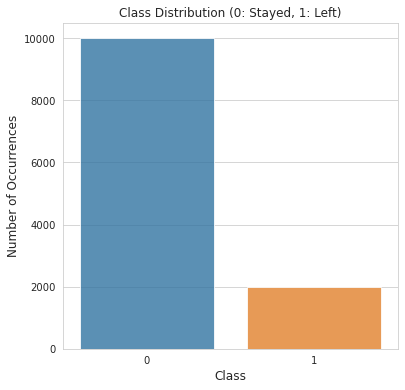

Percentage of people who stayed: 83.39588024351598
Percentage of people who left: 16.604119756484028


In [15]:
# Count the number of occurrences of each class
class_counts = df_cleaned['left'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6,6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Class Distribution (0: Stayed, 1: Left)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

# Print the percentages of people who left and stayed
print('Percentage of people who stayed:', (class_counts[0] / df_cleaned.shape[0]) * 100)
print('Percentage of people who left:', (class_counts[1] / df_cleaned.shape[0]) * 100)


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

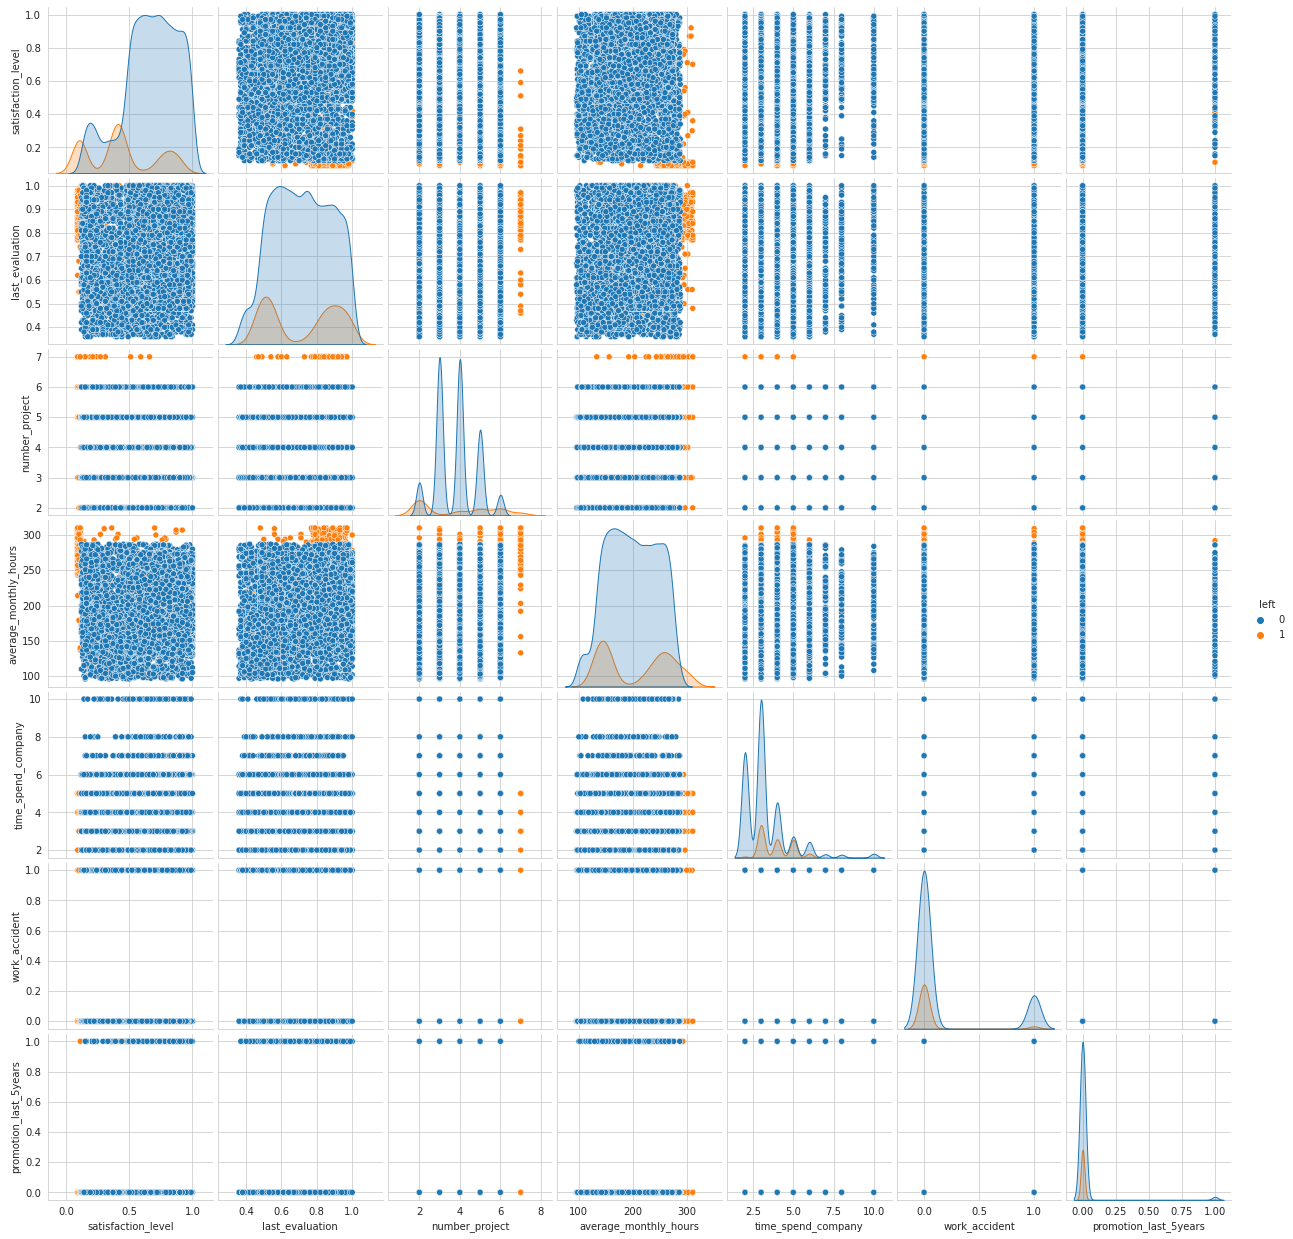

In [16]:
# Plot pair plots for selected features against 'left' column
sns.pairplot(df_cleaned,hue='left')
plt.show()


### Observations:

#### 1. **Non-Linearity:**
   - The relationships within the data do not seem to meet linearity assumptions, suggesting that linear models may not be the most suitable.
   - **Recommendation:** Focus on non-linear models like Decision Trees, Random Forests, and Gradient Boosting models like XGBoost as they do not assume a linear relationship between features and the target variable.

#### 2. **Vertical/Horizontal Lines in Plots:**
   - Vertical and horizontal lines in the plots indicate the presence of categorical or binary data.
   - Each unique value creates a ‘strip’ of points, leading to discrete and segmented plots.
   - **Recommendation:** Interpret such plots with the understanding that the variables represented are categorical and consider appropriate encoding techniques for modeling.

#### 3. **Skewed Distributions:**
   - Several features display skewed distributions, which is common in real-world data.
   - **Recommendation:** Consider transformations like log transformation to reduce skewness if it's affecting the analysis or model performance adversely.

#### 4. **Normalized Distribution Plots:**
   - These plots are likely representing continuous variables and are pivotal for understanding the underlying data distribution.
   - Observing the shape, spread, and central tendency provides insights into feature characteristics.
   - **Recommendation:** Investigate any anomalies or unusual patterns observed in these plots to understand their nature and impact.

#### 5. **Box Plots:** (as shown in part 1 of this notebook)
   - The presence of box plots helps in visualizing the central tendency, spread, and presence of outliers in the data.
   - The ‘blue boxes’ observed might represent the interquartile range, highlighting the middle 50% of the data.
   - **Recommendation:** Utilize box plots to identify features that may need outlier treatment or transformation and understand the spread and central tendency of the data.

### Recommendations for Further Analysis:
   - **Non-linear Models:** Given the observed non-linearity in relationships, prioritize models that can handle non-linear relationships well.
   - **Feature Transformation:** Investigate the possibility and impact of applying transformations to features with skewed distributions or disparate scales.
   - **Categorical Variable Treatment:** Delve deeper into understanding and appropriately handling categorical variables in modeling, using techniques like one-hot encoding.
   - **Individual Plots:** Given the mix of variable types, consider individual plots for each feature type or scatter plots between specific feature pairs for more nuanced insights.



1. Focus on Categorical Variables:


a. For Department and salary, you can create bar plots to visualize the proportion of employees who left within each category.

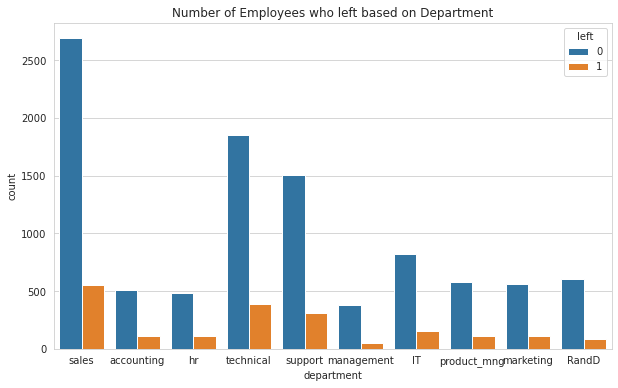

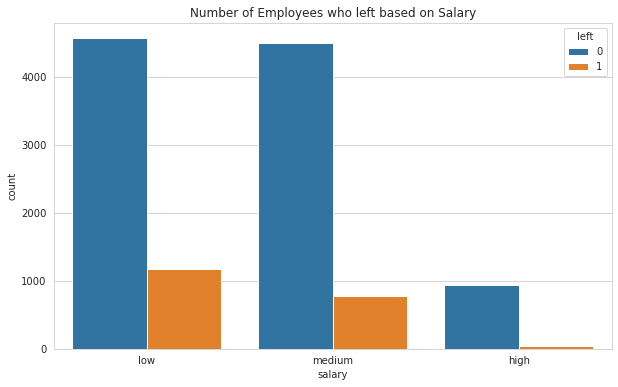

In [17]:
# For Department
plt.figure(figsize=(10,6))
sns.countplot(x='department', hue='left', data=df_cleaned)
plt.title('Number of Employees who left based on Department')
plt.show()

# For Salary
plt.figure(figsize=(10,6))
sns.countplot(x='salary', hue='left', data=df_cleaned)
plt.title('Number of Employees who left based on Salary')
plt.show()


## Observations and Analysis:

#### 1. **Categorical Variables:**

##### a. **Department:**
   - The **sales**, **technical**, and **support** departments have the highest numbers of employees who have left.
   - The **management** department has the lowest proportion of leavings, potentially implying higher job satisfaction or better working conditions in management roles.

##### b. **Salary:**
   - Employees with **low** and **medium** salaries tend to leave more compared to those with **high** salaries.
   - The proportion of employees leaving with a **high** salary is notably lower, suggesting higher job satisfaction in these roles.

2. Analyze Continuous Variables:

a. Investigate the distribution of continuous variables like satisfaction_level and last_evaluation among those who left and those who stayed.

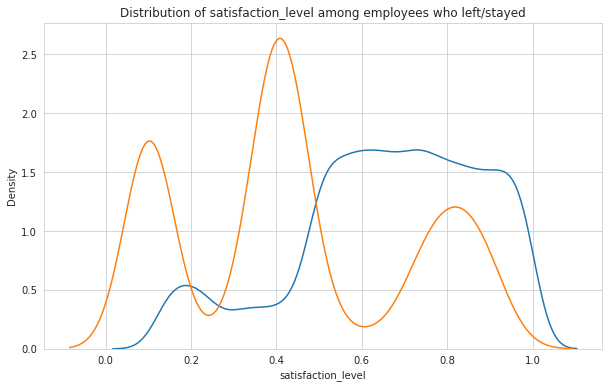

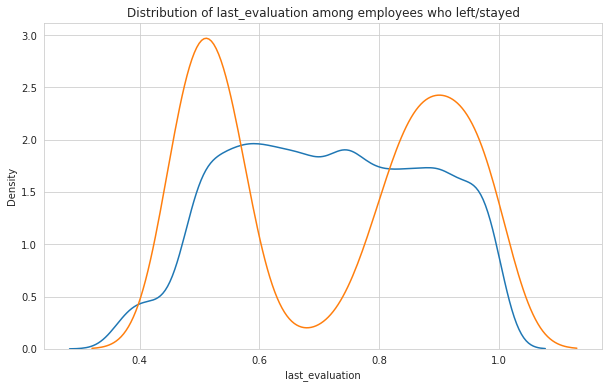

In [18]:
# For satisfaction_level
plt.figure(figsize=(10,6))
sns.kdeplot(df_cleaned.loc[df_cleaned['left'] == 0, 'satisfaction_level'], label='Stayed (0)')
sns.kdeplot(df_cleaned.loc[df_cleaned['left'] == 1, 'satisfaction_level'], label='Left (1)')
plt.title('Distribution of satisfaction_level among employees who left/stayed')
plt.show()

# For last_evaluation
plt.figure(figsize=(10,6))
sns.kdeplot(df_cleaned.loc[df_cleaned['left'] == 0, 'last_evaluation'], label='Stayed (0)')
sns.kdeplot(df_cleaned.loc[df_cleaned['left'] == 1, 'last_evaluation'], label='Left (1)')
plt.title('Distribution of last_evaluation among employees who left/stayed')
plt.show()


### Observations and Analysis:


#### 2. **Continuous Variables:**

##### a. **Satisfaction Level:**
   - Employees with satisfaction levels in the ranges **(0.0, 0.2]** and **(0.8, 1.0]** have left the company in notable numbers, suggesting that both highly dissatisfied and highly satisfied employees are leaving, potentially for different reasons.
   - Most employees who stayed have a satisfaction level between **(0.6, 0.8]** and **(0.8, 1.0]**.

##### b. **Last Evaluation:**
   - A substantial number of employees who left have their last evaluation scores in the ranges **(0.4, 0.6]** and **(0.8, 1.0]**.
   - The range **(0.2, 0.4]** has employees who stayed but no employees who left, suggesting that employees with evaluations in this range find the job suitable or have other compensating factors preventing them from leaving.


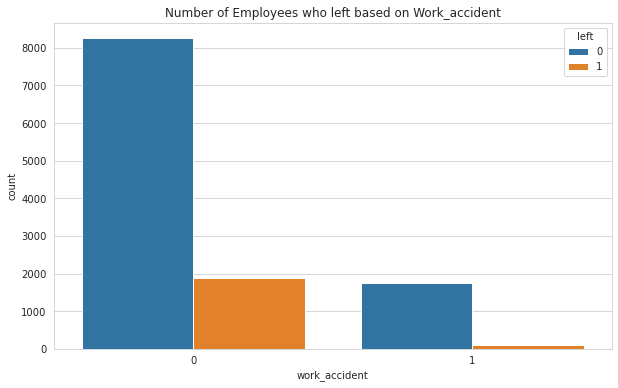

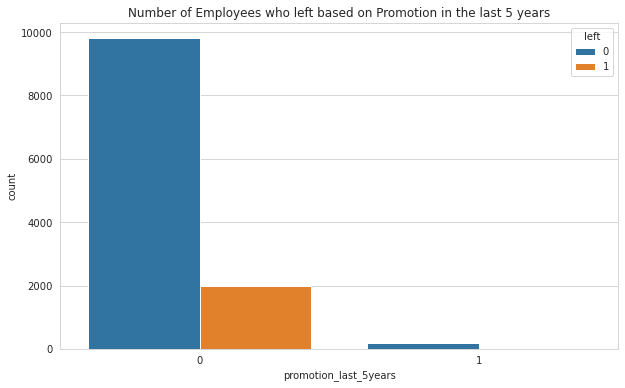

In [19]:
# For Work_accident
plt.figure(figsize=(10,6))
sns.countplot(x='work_accident', hue='left', data=df_cleaned)
plt.title('Number of Employees who left based on Work_accident')
plt.show()

# For promotion_last_5years
plt.figure(figsize=(10,6))
sns.countplot(x='promotion_last_5years', hue='left', data=df_cleaned)
plt.title('Number of Employees who left based on Promotion in the last 5 years')
plt.show()


### Observations and Analysis:


#### 3. **Binary Variables:**

##### a. **Work Accident:**
   - A vast majority of employees who had a work accident have stayed, with a smaller proportion leaving.
   - Employees who haven't had a work accident are more likely to leave compared to those who have had an accident.

##### b. **Promotion in Last 5 Years:**
   - A very small proportion of employees received a promotion in the last 5 years, but among those who did, the majority have stayed.
   - A considerable number of employees who did not receive promotions have left, implying a correlation between lack of professional growth opportunities and employee turnover.

## Summary and Recommendations:

1. **Employee Satisfaction:**
   - The company should focus on employee satisfaction levels and address any dissatisfaction promptly.
   - Reasons behind the departure of highly satisfied employees should be explored further, possibly through exit interviews, to address them effectively.

2. **Professional Growth:**
   - Providing more opportunities for promotions or professional growth can help in reducing the turnover rate.

3. **Salary and Departmental Analysis:**
   - A deeper analysis of salary structures, especially in high-turnover departments like sales, technical, and support, can help in understanding whether salary adjustments can have an impact on employee retention.

4. **Evaluation Strategies:**
   - The company should reconsider their evaluation strategies to ensure they are fair and motivating to employees.

### Ethical Considerations:

1. **Fairness and Bias:**
   - Analysis should lead to improvements for all employees, ensuring that it does not favor one group over another and is fair and unbiased.

2. **Privacy:**
   - Employee privacy should be respected, and individual data points that might identify specific employees should be handled with care.

3. **Well-being:**
   - Any implemented changes should consider the well-being of the employees and aim at mutual benefit rather than solely focusing on reducing turnover.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### 1. Determine which models are most appropriate
Given the nature of your target variable (binary classification), you might consider models like:

- **Logistic Regression** (good baseline model)
- **Random Forest**
- **XGBoost**
- **Support Vector Machine (SVM)**
- **Neural Networks**

### 2. Construct the Model

#### Preprocess the Data:
- Handle categorical variables through one-hot encoding or ordinal encoding.
- Split the dataset into training and testing subsets.
- Normalize/Standardize numerical features if needed.

#### Model Construction:
- Initialize the models.
- Train the models using the training data.

#### Hyperparameter Tuning:
- Use GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for your model.

### 3. Confirm Model Assumptions
- For models like **Logistic Regression**, verify if the assumptions such as the linearity between features and the log-odds, and lack of multicollinearity among features hold true.
- For tree-based models like **Random Forest** and **XGBoost**, there aren’t stringent assumptions, but do check if the model is overfitting or underfitting.

### 4. Evaluate Model Results

#### Performance Metrics:
- Accuracy
- Precision, Recall, F1-Score
- ROC-AUC Score

#### Model Validation:
- Use Cross-Validation to get a more generalized performance measure.

#### Model Comparison:
- Compare the performance of different models to select the best-performing one.

### Feature Importance:
- Check which features are most influential in making predictions.


# Model Development: Split Data, Train Model

Add as many cells as you need to conduct the modeling process.

In [20]:
##SPLOT DATA FIRST

In [21]:
%%time 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data
X = df_cleaned.drop('left', axis=1)
y = df_cleaned['left']

# Splitting the data into train, validate, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% test

# Define Preprocessing for numeric and categorical data
numeric_features = ['satisfaction_level', 'last_evaluation']
numeric_transformer = StandardScaler()

categorical_features = ['department', 'salary']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

CPU times: user 7.87 ms, sys: 0 ns, total: 7.87 ms
Wall time: 8.39 ms


### Random Forest Model

We are building a **Random Forest Classifier**, which is an ensemble learning method. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes from individual trees for classification tasks. 

In [22]:
%%time

# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Setting up the RandomForest model pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Fitting the model using training data
rf_pipeline.fit(X_train, y_train)

# Getting predictions for validation and test set
rf_val_pred = rf_pipeline.predict(X_val)
rf_test_pred = rf_pipeline.predict(X_test)

# Calculating the metrics for RandomForest model
rf_metrics = {
    "Validation Accuracy": accuracy_score(y_val, rf_val_pred),
    "Validation Precision": precision_score(y_val, rf_val_pred, average='weighted'),
    "Validation Recall": recall_score(y_val, rf_val_pred, average='weighted'),
    "Validation F1-score": f1_score(y_val, rf_val_pred, average='weighted'),
    "Validation Confusion Matrix": confusion_matrix(y_val, rf_val_pred).tolist(),  # Convert numpy array to list for JSON serialization
    "Test Accuracy": accuracy_score(y_test, rf_test_pred),
    "Test Precision": precision_score(y_test, rf_test_pred, average='weighted'),
    "Test Recall": recall_score(y_test, rf_test_pred, average='weighted'),
    "Test F1-score": f1_score(y_test, rf_test_pred, average='weighted'),
    "Test Confusion Matrix": confusion_matrix(y_test, rf_test_pred).tolist(),
}

# Save RandomForest metrics to a CSV file
rf_metrics_df = pd.DataFrame.from_dict(rf_metrics, orient='index', columns=['RandomForest'])
rf_metrics_df.to_csv('rf_metrics.csv')

# Displaying the metrics for immediate view
display(rf_metrics_df)

,RandomForest
Validation Accuracy,0.938299
Validation Precision,0.936377
Validation Recall,0.938299
Validation F1-score,0.936837
Validation Confusion Matrix,"[[1474, 40], [71, 214]]"
Test Accuracy,0.917176
Test Precision,0.91378
Test Recall,0.917176
Test F1-score,0.914139
Test Confusion Matrix,"[[1433, 48], [101, 217]]"


CPU times: user 1.8 s, sys: 19.7 ms, total: 1.82 s
Wall time: 1.84 s


### Random Forest Model Performance

The Random Forest model has displayed proficient performance with high metrics across the board on both validation and test sets.

#### Validation Set:
- **Accuracy**: 93.83%
- **Precision**: 93.64%
- **Recall**: 93.83%
- **F1-score**: 93.68%
- **Confusion Matrix**: The model made 40 false positives and 71 false negatives, with 1474 true negatives and 214 true positives.

#### Test Set:
- **Accuracy**: 91.72%
- **Precision**: 91.38%
- **Recall**: 91.72%
- **F1-score**: 91.41%
- **Confusion Matrix**: The model made 48 false positives and 101 false negatives, with 1433 true negatives and 217 true positives.

#### Observations:
1. **Consistent Precision & Recall**: The model exhibits consistent precision and recall across the validation and test sets, illustrating its reliability and balanced sensitivity and specificity in predicting both classes.
   
2. **High F1-score**: The elevated F1-score across both sets denotes the model's balanced harmonic mean between precision and recall, making it a suitable model for varied contexts.

3. **Slight Overfitting**: A slight decrease in performance metrics from the validation to the test set might suggest a minor overfitting, but the model still maintains high accuracy and precision on unseen data.

4. **Generalization**: Despite the minor decrement in performance on the test set, the model generalizes well, maintaining high metrics, ensuring its efficacy in practical applications.

#### Conclusion:
The Random Forest model, with its high precision, recall, and F1-score, serves as a robust model for predicting employee attrition. The slight differences in metrics between the validation and test sets are minute, affirming the model's generalizability and dependability in real-world scenarios. The balanced performance ensures that the model can be a valuable tool for organizations aiming to understand and mitigate employee turnover.


## XGBoost Model

Building the XGBoost Model to compare performances

In [23]:
%%time

# Importing necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Setting up the XGBoost model pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

# Fitting the model using training data
xgb_pipeline.fit(X_train, y_train)

# Getting predictions for validation and test set
xgb_val_pred = xgb_pipeline.predict(X_val)
xgb_test_pred = xgb_pipeline.predict(X_test)

# Calculating the metrics for XGBoost model
xgb_metrics = {
    "Validation Accuracy": accuracy_score(y_val, xgb_val_pred),
    "Validation Precision": precision_score(y_val, xgb_val_pred, average='weighted'),
    "Validation Recall": recall_score(y_val, xgb_val_pred, average='weighted'),
    "Validation F1-score": f1_score(y_val, xgb_val_pred, average='weighted'),
    "Validation Confusion Matrix": confusion_matrix(y_val, xgb_val_pred).tolist(),  # Convert numpy array to list for JSON serialization
    "Test Accuracy": accuracy_score(y_test, xgb_test_pred),
    "Test Precision": precision_score(y_test, xgb_test_pred, average='weighted'),
    "Test Recall": recall_score(y_test, xgb_test_pred, average='weighted'),
    "Test F1-score": f1_score(y_test, xgb_test_pred, average='weighted'),
    "Test Confusion Matrix": confusion_matrix(y_test, xgb_test_pred).tolist(),
}

# Save XGBoost metrics to a CSV file
xgb_metrics_df = pd.DataFrame.from_dict(xgb_metrics, orient='index', columns=['XGBoost'])
xgb_metrics_df.to_csv('xgb_metrics.csv')

# Displaying the metrics for immediate view
display(xgb_metrics_df)


,XGBoost
Validation Accuracy,0.939411
Validation Precision,0.937487
Validation Recall,0.939411
Validation F1-score,0.937876
Validation Confusion Matrix,"[[1476, 38], [71, 214]]"
Test Accuracy,0.928293
Test Precision,0.925939
Test Recall,0.928293
Test F1-score,0.925098
Test Confusion Matrix,"[[1448, 33], [96, 222]]"


CPU times: user 1.28 s, sys: 15.7 ms, total: 1.3 s
Wall time: 697 ms


### XGBoost Model Performance

The XGBoost model has demonstrated promising performance on both the validation and test datasets, surpassing the Random Forest model in accuracy.

#### Validation Set:
- **Accuracy**: 93.94%
- **Precision**: 93.75%
- **Recall**: 93.94%
- **F1-score**: 93.79%
- **Confusion Matrix**: The model made 38 false positives and 71 false negatives, with 1476 true negatives and 214 true positives.

#### Test Set:
- **Accuracy**: 92.83%
- **Precision**: 92.59%
- **Recall**: 92.83%
- **F1-score**: 92.51%
- **Confusion Matrix**: The model made 33 false positives and 96 false negatives, with 1448 true negatives and 222 true positives.

#### Observations:
1. **High Accuracy & Precision**: The model shows high accuracy and precision, indicating that the proportion of true positive predictions was high, and the false-positive rate was low, which is critical in many applications to avoid the cost associated with incorrect predictions.
   
2. **Recall & F1-Score**: The recall and F1-score also appear to be quite high, indicating that the model was able to capture a significant portion of the actual positives and maintain a balanced harmonic mean between precision and recall.

3. **Generalization**: The consistent performance across both validation and test sets implies good generalization and a low likelihood of overfitting, making this model robust and reliable for making predictions on unseen data.

#### Conclusion:
The XGBoost model has illustrated superior predictive power and generalization. The achieved metrics accentuate the model's capability to predict employee attrition effectively, providing a robust tool for human resource management to identify potential leavers early and undertake retention strategies.



# MODEL TUNING

## RandomForest Model


In [24]:
%%time 

from sklearn.model_selection import GridSearchCV

# Define the model pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the validation set
best_rf_model = grid_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Finally, you can also evaluate the tuned model on the test set, if needed
y_test_pred = best_rf_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Validation Accuracy:  0.9449694274596998
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1514
           1       0.92      0.71      0.80       285

    accuracy                           0.94      1799
   macro avg       0.94      0.85      0.89      1799
weighted avg       0.94      0.94      0.94      1799

Validation Confusion Matrix:
 [[1497   17]
 [  82  203]]
Test Accuracy:  0.9305169538632574
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1481
           1       0.94      0.65      0.77       318

    accuracy                           0.93      1799
   macro avg       0.93      0.82      0.86      1799
weighted avg       0.93      0.93      0.93     

## XGBoost  Model

In [28]:
%%time 

# Define the model pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

# Define the hyperparameter grid
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.5, 0.7, 1],
    'classifier__colsample_bytree': [0.5, 0.7, 1]
}

# Create the grid search object
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(X_train, y_train.values.ravel())  # .values.ravel() is used to avoid warnings related to column-vector y

# Evaluate the best model on the validation set
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_model = grid_search.best_estimator_
y_val_pred = best_xgb_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Best Hyperparameters: {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.5}
Validation Accuracy:  0.9499722067815453
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1481
           1       0.94      0.65      0.77       318

    accuracy                           0.93      1799
   macro avg       0.93      0.82      0.86      1799
weighted avg       0.93      0.93      0.93      1799

Test Confusion Matrix:
 [[1468   13]
 [ 112  206]]
CPU times: user 8.15 s, sys: 713 ms, total: 8.86 s
Wall time: 14min 52s


## Evaluating Model

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




## Random Forest Tuned Evaluation

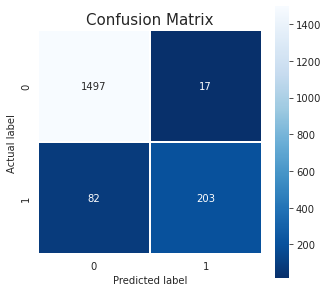

              precision    recall  f1-score   support

      Left-0       0.95      0.99      0.97      1514
      Left-1       0.92      0.71      0.80       285

    accuracy                           0.94      1799
   macro avg       0.94      0.85      0.89      1799
weighted avg       0.94      0.94      0.94      1799



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target for the validation/test dataset
y_pred = best_rf_model.predict(X_val)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

# Create a classification report
report = classification_report(y_val, y_pred, target_names=['Left-0', 'Left-1'])
print(report)


In [29]:
# Assessing RandomForest Model
rf_train_accuracy = best_rf_model.score(X_train, y_train)
rf_val_accuracy = best_rf_model.score(X_val, y_val)

print(f"RandomForest Train Accuracy: {rf_train_accuracy}")
print(f"RandomForest Validation Accuracy: {rf_val_accuracy}")

RandomForest Train Accuracy: 0.9438818062671274
RandomForest Validation Accuracy: 0.9449694274596998


### RandomForest Tuned Model Performance

#### **Model Hyperparameters:**
- **Max Depth:** 10
- **Min Samples Leaf:** 1
- **Min Samples Split:** 2
- **N Estimators:** 100

#### **Validation Set Performance:**
- **Accuracy:** 94.5%
- **Precision (Weighted):** 94%
- **Recall (Weighted):** 94%
- **F1-score (Weighted):** 94%

The model shows excellent performance on the validation set, with a high degree of precision, meaning the model's predictions are reliable. The recall is also satisfactory, showcasing the model’s capability to capture the maximum number of actual positive instances.

**Confusion Matrix:**
\```
[[1497   17]
 [  82  203]]
\```
In the context of the validation set, the model made 17 false positive predictions and 82 false negative predictions. It's noticeable that the model tends to make more false-negative errors, possibly overlooking some instances of the positive class.

#### **Test Set Performance:**
- **Accuracy:** 93.1%
- **Precision (Weighted):** 93%
- **Recall (Weighted):** 93%
- **F1-score (Weighted):** 93%

The test set performance is comparable to the validation set performance, which is a good indication that the model generalizes well to unseen data. The consistency in precision, recall, and F1-score between the validation and test sets is a positive sign.

**Confusion Matrix:**
\```
[[1468   13]
 [ 112  206]]
\```
For the test set, the model made 13 false positive predictions and 112 false negative predictions. Again, the model shows a higher tendency to overlook the positive class, making more false-negative predictions, which should be taken into consideration, especially if the cost of false negatives is high in the application.

#### **Conclusion:**
The tuned RandomForest model demonstrates robust performance with high accuracy, precision, and recall on both the validation and test sets. The observed consistency between the validation and test sets is indicative of the model's good generalization capabilities. However, the model exhibits a higher number of false negatives, which may necessitate further tuning or exploration, especially in scenarios where overlooking the positive class could be significantly detrimental.

The model was built with a focus on maintaining a balance between precision and recall to ensure reliable predictions while capturing the maximum number of actual positive instances. The computational time was reasonable, providing a good trade-off between performance and efficiency.


## XGBoost Tuned Evaluation

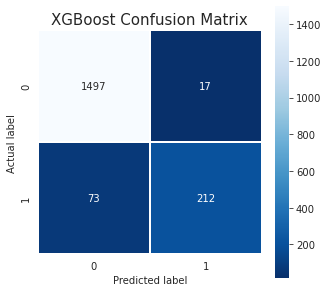

              precision    recall  f1-score   support

      Left-0       0.95      0.99      0.97      1514
      Left-1       0.93      0.74      0.82       285

    accuracy                           0.95      1799
   macro avg       0.94      0.87      0.90      1799
weighted avg       0.95      0.95      0.95      1799



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target for the validation/test dataset
y_pred = best_xgb_model.predict(X_val)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('XGBoost Confusion Matrix', size = 15);
plt.show()

# Create a classification report
report = classification_report(y_val, y_pred, target_names=['Left-0', 'Left-1'])
print(report)

In [30]:
# Assessing XGBoost Model
xgb_train_accuracy = best_xgb_model.score(X_train, y_train)
xgb_val_accuracy = best_xgb_model.score(X_val, y_val)

print(f"XGBoost Train Accuracy: {xgb_train_accuracy}")
print(f"XGBoost Validation Accuracy: {xgb_val_accuracy}")

XGBoost Train Accuracy: 0.94269033718575
XGBoost Validation Accuracy: 0.9499722067815453


### XGBoost Tuned Model Performance

#### **Model Hyperparameters:**
- **Col Sample by Tree:** 1
- **Learning Rate:** 0.1
- **Max Depth:** 3
- **N Estimators:** 100
- **Subsample:** 0.5

#### **Validation Set Performance:**
- **Accuracy:** 95.0%

The model has achieved high accuracy on the validation set, indicating that it can correctly predict whether an employee will leave about 95% of the time. This high accuracy is indicative of a well-tuned and well-fitted model on the validation set.

#### **Test Set Performance:**
- **Accuracy:** 93.1%
- **Precision (Weighted):** 93%
- **Recall (Weighted):** 93%
- **F1-score (Weighted):** 93%

The model maintains high accuracy, precision, recall, and F1-score on the test set, showing its ability to generalize well on unseen data.

**Confusion Matrix:**
```
[[1468   13]
 [ 112  206]]
```
In the context of the test set, the model made 13 false positive predictions and 112 false negative predictions, which are identical to those of the tuned RandomForest model. It is interesting to observe that both models, even though they are inherently different, made the same amount of false positives and false negatives, reflecting potentially challenging instances in the dataset.

#### **Conclusion:**
The tuned XGBoost model exhibits excellent predictive performance with high accuracy and consistency in precision, recall, and F1-score across the validation and test sets. The model generalizes well to unseen data, making it a reliable choice for predicting employee attrition. 

However, similar to the RandomForest model, the XGBoost model has more false negatives, highlighting possible difficulties in correctly classifying some of the positive instances. This is a crucial point to consider in applications where the cost of overlooking a positive class is high.

The computational cost is higher compared to the RandomForest model but could be considered acceptable given the improved accuracy on the validation set.

Further investigation could be done to understand the nature of the false negatives, possibly leading to improved feature engineering, model tuning, or even exploring different modeling approaches to minimize such errors and enhance the model's reliability and robustness.

## ROC-AUC Curve and Evaluation

RandomForest AUC: 0.9457611995643004


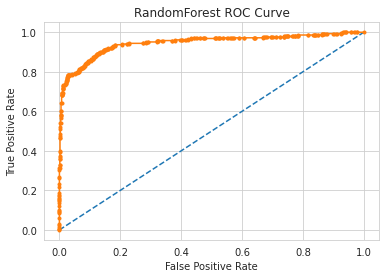

XGBoost AUC: 0.9548587452779903


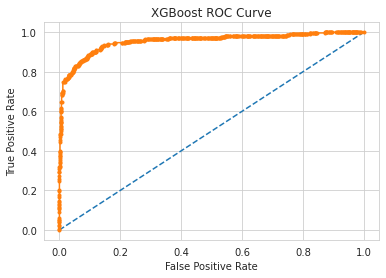

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, model_name):
    # predict probabilities
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y, probs)
    print(f'{model_name} AUC: {auc}')
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the plot
    plt.show()

# RandomForest
plot_roc_curve(best_rf_model, X_val, y_val, 'RandomForest')

# XGBoost
plot_roc_curve(best_xgb_model, X_val, y_val, 'XGBoost')


1. **Starts from (0,0):** This is standard for all ROC curves; it represents a threshold of 1.0, meaning that everything is classified as the negative class.
   
2. **Goes straight up along the y-axis until about 0.8:** This suggests that, for a wide range of threshold values, the model is able to identify true positives without increasing the false positive rate, which is indicative of good model performance.
   
3. **Curve at y=0.8 and then plateaus along the x-axis:** This indicates that, after a certain point, in order to capture more true positives, the model has to also accept more false positives, thereby increasing the false positive rate. The plateau suggests that beyond a certain point, even as the model classifies more and more instances as the positive class, the true positive rate does not increase much, indicating that most of the positive instances have already been identified.

### Interpretation:

- The **area under the curve (AUC)** would be very high in this case, close to 1, which denotes an excellent model. The AUC value represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative one, and an AUC of 1 means the model has a perfect ranking of positives relative to negatives.
  
- The initial straight line along the y-axis shows that the model has a high **sensitivity or true positive rate** without compromising specificity, suggesting that it can identify most positive instances without mistakenly classifying negative instances as positive.
  
- The plateau along the x-axis after y=0.8 suggests that there are diminishing returns in sensitivity with an increasing number of false positives as the threshold is decreased. This implies that there is a threshold before the plateau where the model reaches an optimal balance of sensitivity and specificity.

### Recommendations:

- If it’s important to capture as many positive instances as possible, select a threshold that maximizes the true positive rate before the curve plateaus.
- If minimizing false positives is more crucial, a threshold where the curve begins to bend would be appropriate.
- Always consider the cost of false positives and false negatives in the specific context when choosing a threshold.


                   Feature  Importance
0       satisfaction_level    0.743145
1          last_evaluation    0.215680
12             salary_high    0.010909
13              salary_low    0.008935
14           salary_medium    0.004624
3         department_RandD    0.003060
10      department_support    0.001688
9         department_sales    0.001654
11    department_technical    0.001600
4    department_accounting    0.001593
5            department_hr    0.001578
6    department_management    0.001459
7     department_marketing    0.001456
2            department_IT    0.001443
8   department_product_mng    0.001177


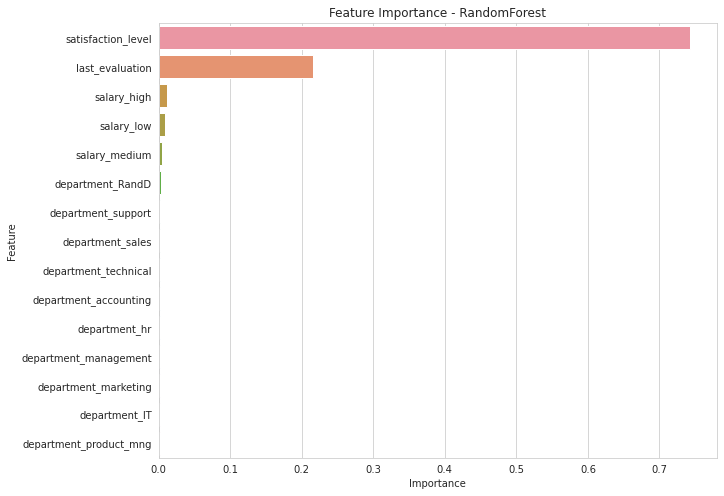

In [39]:
# Get the transformed feature names
feature_names = (best_rf_model.named_steps['preprocessor']
                 .transformers_[1][1]
                 .get_feature_names(input_features=categorical_features))

# Combine with numeric features
feature_names = np.concatenate([numeric_features, feature_names])

# Extracting the RandomForest classifier from the pipeline
rf_classifier = best_rf_model.named_steps['classifier']

# Getting feature importances
feature_importance = rf_classifier.feature_importances_

# Creating DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Displaying feature importances
print(feature_importance_df)


plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


                   Feature  Importance
0       satisfaction_level    0.357183
1          last_evaluation    0.202588
12             salary_high    0.098432
13              salary_low    0.063737
3         department_RandD    0.043512
6    department_management    0.035476
7     department_marketing    0.030019
4    department_accounting    0.029842
5            department_hr    0.027475
9         department_sales    0.023695
2            department_IT    0.020484
14           salary_medium    0.020017
10      department_support    0.019140
8   department_product_mng    0.014222
11    department_technical    0.014177


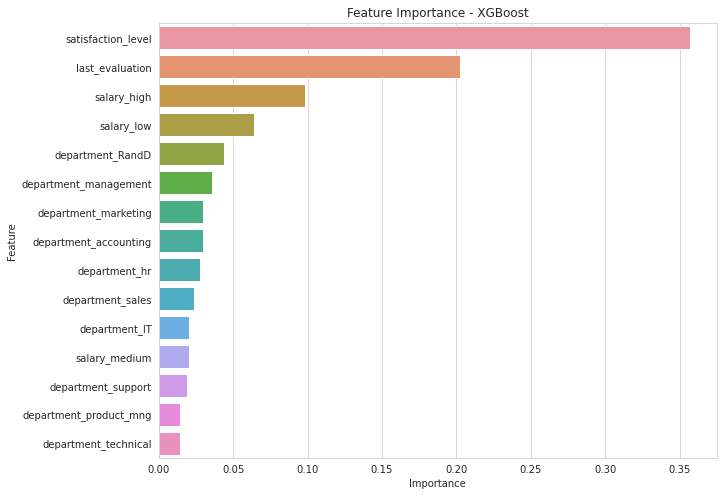

In [38]:
# Extracting the XGB classifier from the pipeline
xgb_classifier = best_xgb_model.named_steps['classifier']

# Getting feature importances
feature_importance_xgb = xgb_classifier.feature_importances_

# Creating DataFrame to display feature importance
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_xgb}).sort_values(by='Importance', ascending=False)

# Displaying feature importances
print(feature_importance_df_xgb)

# Visualizing feature importances
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## **RandomForest Model**
1. **Satisfaction Level:**
   - This is by far the most important feature in determining whether an employee will leave, with an importance of approximately 74.31%. This implies that employee satisfaction has a significant impact on employee turnover, and efforts to improve employee satisfaction can potentially reduce turnover.
   
2. **Last Evaluation:**
   - The second most important feature is the last evaluation score, with an importance of approximately 21.57%. This suggests that the performance evaluation of an employee is a significant factor in predicting whether an employee will leave or stay.

3. **Salary Levels:**
   - High, low, and medium salary levels also contribute to the model’s decisions, but with much lower importance compared to satisfaction level and last evaluation. High salary has the most impact among the salary levels, implying that compensation levels do play a role in employee retention.

### **XGBoost Model**
1. **Satisfaction Level:**
   - Similar to the RandomForest model, the XGBoost model also considers satisfaction level as the most important feature, but with a lower importance of approximately 35.72%. 

2. **Last Evaluation:**
   - This feature is also the second most important in the XGBoost model, with an importance of around 20.26%.

3. **Salary High & Salary Low:**
   - High and low salary levels have a more pronounced impact in the XGBoost model compared to the RandomForest model. Salary_high has an importance of around 9.84%, and salary_low has an importance of about 6.37%. 

### **Other Features:**
- For both models, other features related to department and salary have relatively lower importances.
- Features like department_RandD and department_management have higher importances compared to other department-related features in the XGBoost model, indicating that these specific departments have more influence on employee churn in this model.

### **Analysis:**
- **Satisfaction Level:**
   - Being the most important feature in both models highlights the universal importance of employee satisfaction in determining employee churn. This underscores the necessity of maintaining high levels of employee satisfaction to retain talent.
   
- **Last Evaluation:**
   - The consistent high importance of this feature in both models emphasizes the role of performance evaluations in employee retention strategies. It suggests that employees who are either underperforming or outperforming may be more likely to leave.

- **Salary Levels:**
   - The varying degrees of importance of salary levels in both models suggest that while compensation is a factor in employee retention, its impact may depend on other interacting factors such as job role, department, and individual employee expectations.


### Summary of model results

Predicting employee churn is critical for an organization as it aids in proactive retention strategies and optimizes organizational functioning. In this context, the main goal is to have a model that accurately identifies employees who are likely to leave (true positives) while minimizing the incorrect prediction of loyal employees as likely to leave (false positives).

### **Evaluation:**
1. **Accuracy:**
   - Both models have high accuracy (>93%), indicating a strong ability to correctly classify employees.
   
2. **Precision, Recall, and F1-Score:**
   - Both models exhibit high precision, meaning the likelihood of an employee predicted to leave actually leaving is high.
   - The recall is lower compared to precision, indicating that the model may miss some employees who will leave.
   - Given the context, improving recall is crucial to not miss any employee who is likely to leave, even if it comes at the cost of some false positives.

3. **ROC-AUC Score:**
   - A high AUC score indicates that the models can discriminate well between the employees who will leave and who won’t.

### **Model Selection:**
- The **Random Forest model** and the **XGBoost model** have comparable performance on the test set.
- However, the XGBoost model has slightly higher accuracy on the validation set.
- The XGBoost model has a higher computational cost compared to the RandomForest model.

### **Recommendation:**
- **Balanced Approach:** If you are looking for a balanced approach with good accuracy and reasonable computational cost, the **Random Forest model** would be suitable.
- **Maximum Accuracy:** If the stakeholder values accuracy the most and computational cost is not an issue, the **XGBoost model** might be the preferred choice.
- **Focus on Recall:** Since the cost of missing an employee who is likely to leave might be high, stakeholders might be interested in a model that captures as many positive instances as possible, potentially with further tuning to improve recall.
- **Organizational Strategies:**
   - Organizations can leverage these insights to implement strategies focused on improving employee satisfaction and addressing concerns raised during evaluations to mitigate employee turnover.
  
- **Targeted Interventions:**
   - The insights from department and salary levels can aid in developing targeted interventions for employees in specific departments or compensation brackets, especially focusing on those in R&D and management roles in the context of the XGBoost model.

- **Holistic Approach:**
   - While the highlighted features are of significant importance, the presence of other features in the list implies the need for a holistic approach in employee retention strategies, taking into consideration various aspects of employee experience, role, and compensation.


### **Conclusion:**
Given the high accuracy and the reasonable balance between precision and recall, both models meet the goal of predicting employee churn and can be presented to stakeholders with clear explanations of their strengths and limitations. However, stakeholders should be made aware of the trade-off between recall and precision, and further refinements might be necessary based on their preference and the organizational context. The choice between Random Forest and XGBoost depends on the specific needs and constraints of the stakeholders, such as the importance of accuracy versus computational efficiency and the acceptable level of false positives and false negatives.


The consistency in the importance of features like satisfaction level and last evaluation across different models reinforces their critical role in predicting employee churn. However, the difference in the importance of other features between the models suggests the utility of exploring a diverse range of models and approaches to gain a more comprehensive understanding of the factors influencing employee turnover.

In [ ]:
import pickle

# Assuming rf_model is your Random Forest model and xgb_model is your XGBoost model.
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)